<center><h1><b>PART - A</b></h1></center>

**DOMAIN :** Automobile


**CONTEXT :** The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.


**DATA DESCRIPTION :**
<li>cylinders : multi-valued discrete</li> <li>acceleration : continuous</li>
<li>displacement: continuous</li> <li>model year : multi-valued discrete</li>
<li>horsepower : continuous</li> <li>origin : multi-valued discrete</li>
<li>weight : continuous</li> <li>car name : string (unique for each instance)</li>
<li>mpg : continuous</li>


**PROJECT OBJECTIVE :** To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Understanding & Exploration:

#### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
names_df = pd.read_csv('Car name.csv')

In [3]:
names_df.shape

(398, 1)

In [4]:
names_df.sample(5)

,car_name
139,ford gran torino (sw)
24,amc gremlin
158,plymouth grand fury
91,chevrolet caprice classic
247,datsun b210 gx


In [5]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Observations:**
1. Only one column of Object datatype is present in dataset
2. No Null values are present in the dataset
3. There are 398 observations in the dataset

#### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [6]:
attributes_df = pd.read_json("Car-Attributes.json")

In [7]:
attributes_df.shape

(398, 8)

In [8]:
attributes_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
73,13.0,8,307.0,130,4098,14.0,72,1
306,28.8,6,173.0,115,2595,11.3,79,1
247,39.4,4,85.0,70,2070,18.6,78,3
375,36.0,4,105.0,74,1980,15.3,82,2
315,24.3,4,151.0,90,3003,20.1,80,1


In [9]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


**Observations:**
1. There are 8 columns, None of the column has Null values
2. All the columns ssems to Numerical (int, float), but there are 3 columns(cylinders, origin, model_year) which are categorical (multi-valued discrete)

#### C. Merge both the DataFrames together to form a single DataFrame

As no columns are common to be merged, concatenating the two Data frames without shuffling

In [10]:
car_df = pd.concat([names_df, attributes_df], axis=1)

In [11]:
car_df.shape

(398, 9)

In [12]:
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### D. Print 5 point summary of the numerical features and share insights

In [14]:
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


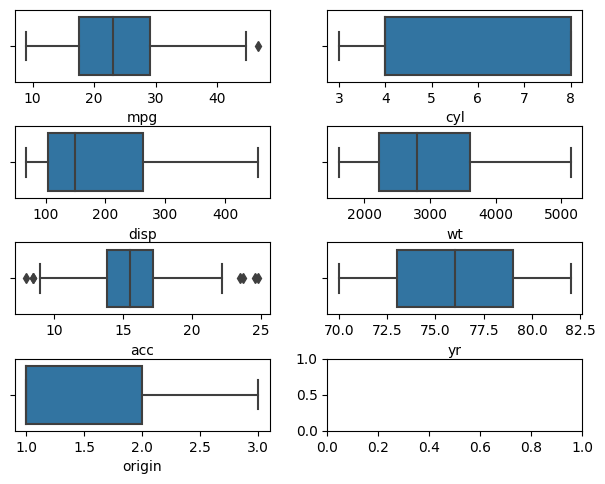

In [15]:
car_columns = car_df.select_dtypes(include='number').columns
fig, ax = plt.subplots(len(car_columns)//2+1,2)
fig.tight_layout()
for i in range(len(car_columns)):
  sns.boxplot(data = car_df, x = car_columns[i], ax = ax[i//2, i%2])


**Observations:**
1. The 'mpg' value varies from 9 to 46.6
2. Mean and Median of 'mpg' are closer to each other.
3. From Boxplot, there can be outliers present in the data on the Maximum extreme
4. Though 'cyl' is *multi-valued discrete* Feature, little analysis as Numerical value shows that minimum of 3 cylinders and Maximum of 8 cylinders can be observed in the dataset
5. 'cyl' column has Mean as 5.46, Median as 4 which shows that most of the cars have cylinders greater that 4
6. 3rd quartile value of 'cyl' is 8, which says more than or equal 25% of total cars have 8 cylinders; same is the case for 4 cylinders as 1st quartile and Median has 4
7.  Minimum value in 'displacement' is 68 and Maximum is 455; There is considerable amount of difference between Mean(193.4) and Median(148.5) - The data can be right skewed
8. Minimum 'wt' is 1613 and Maximum is '5140'; small right skewness can be observed as Mean > median and the difference is small
9. 'acc' seems to be symmetric as mean and median seem to be close and difference between median and first quartile is comparably similar to difference between third quartile and median. Data can b containing outliers
10. 'yr' is a *multi-valued discrete* Feature and can be seen evenly distributed from 70 to 82
11. 'Origin' is a *multi-valued discrete* Feature, more than or equal to 50% of the data has origin '1'

### 2. Data Preparation & Analysis:

#### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [16]:
car_df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [17]:
print('Missing Values: ')
print("="*20)
for col in car_df.columns:
  print(f"{col} : {car_df[col].isnull().sum()/car_df.shape[0]*100}%")

Missing Values: 
car_name : 0.0%
mpg : 0.0%
cyl : 0.0%
disp : 0.0%
hp : 0.0%
wt : 0.0%
acc : 0.0%
yr : 0.0%
origin : 0.0%


No data seems to be missing

#### B. Check for duplicate values in the data and impute with the best suitable approach.

In [18]:
car_df.duplicated().sum()

0

**Observations:**
No duplicates are present in the data

### C. Plot a pairplot for all features

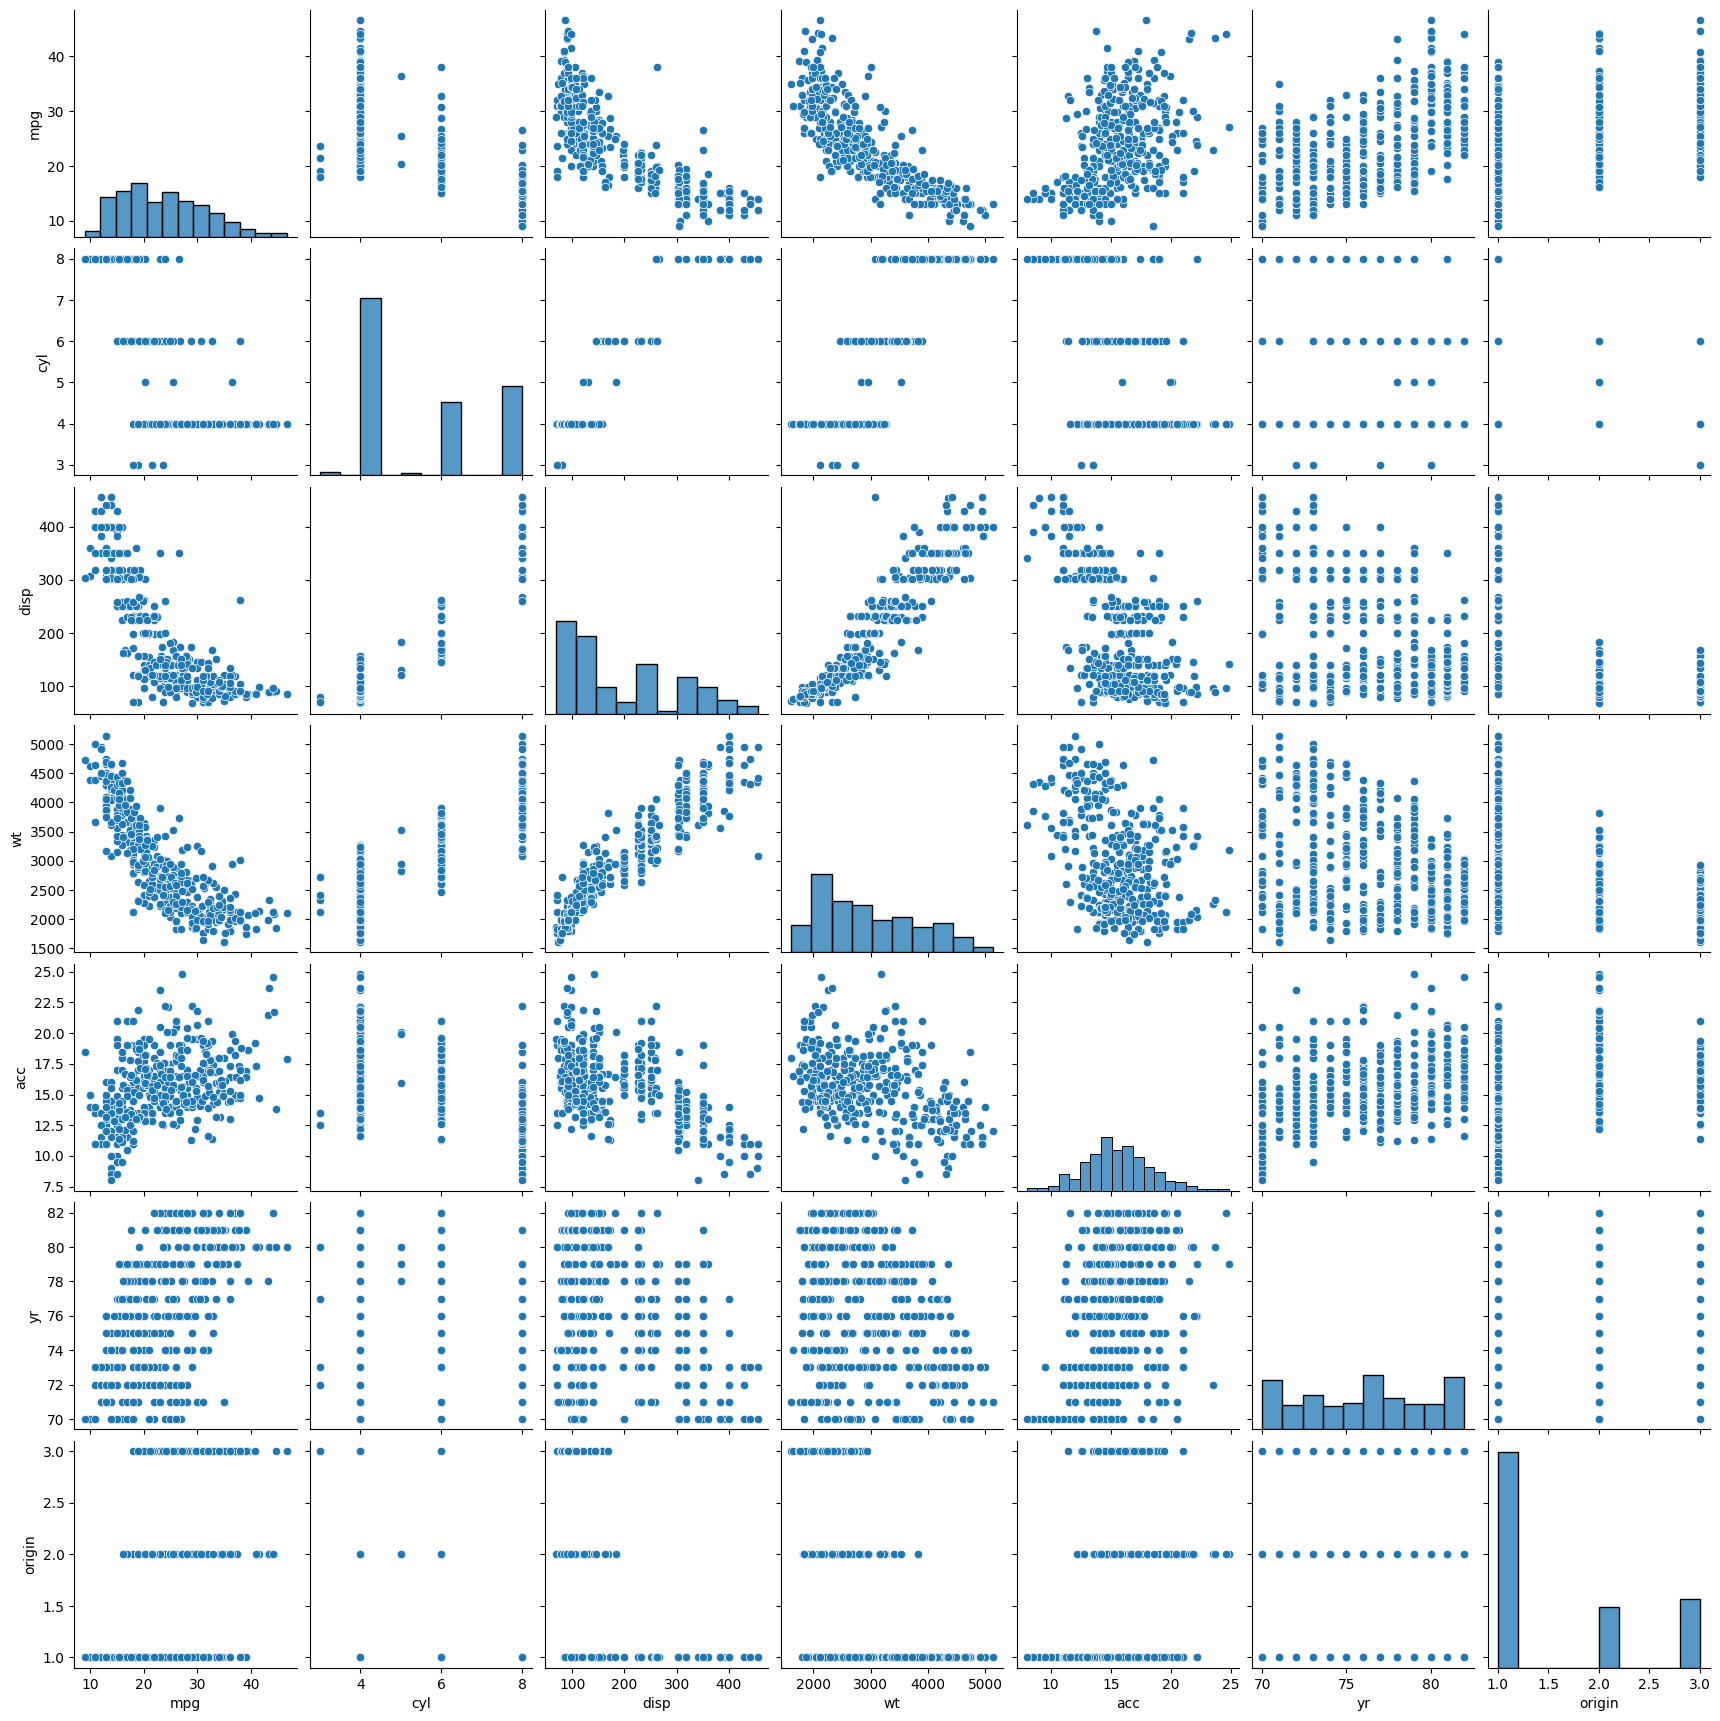

In [19]:
sns.pairplot(car_df)

**Observations:**

1. Correlations can be seen in following pairs:
mpg-disp; mg-wt; disp-wt; disp-acc;
2. mpg, acc seem to be nomaly distributed
3. yr seems to be nearly unifrom distributed
4. disp, wt can be seen to be bi-Modal data
5. Though cyl is categorical, a strong correlation can be seen with disp and wt

#### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

#### E. Share insights for Q2.D

<Axes: xlabel='wt', ylabel='disp'>

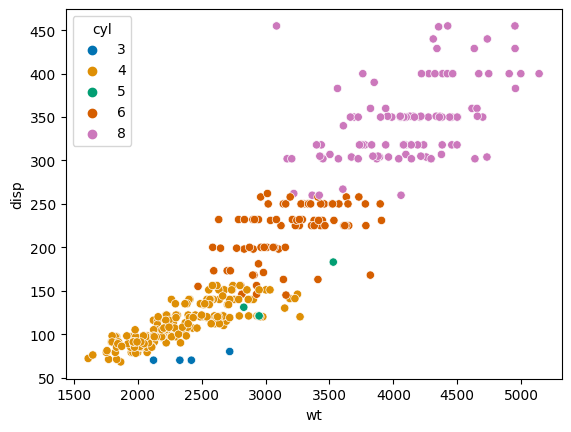

In [20]:
sns.scatterplot(data=car_df, x='wt', y='disp', hue='cyl', palette='colorblind')

**Observations:**

1. A strong postive correlation can be seen between the 'wt' and 'disp'
2. for higher Number of cylinders,both disp and wt are high
3. for lesser Number of cylinders,both disp and wt are low
4. A clear seperation between the data points can be seen wrt Number of cylinders, wt and disp

#### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

#### G. Share insights for Q2.F.

<Axes: xlabel='wt', ylabel='mpg'>

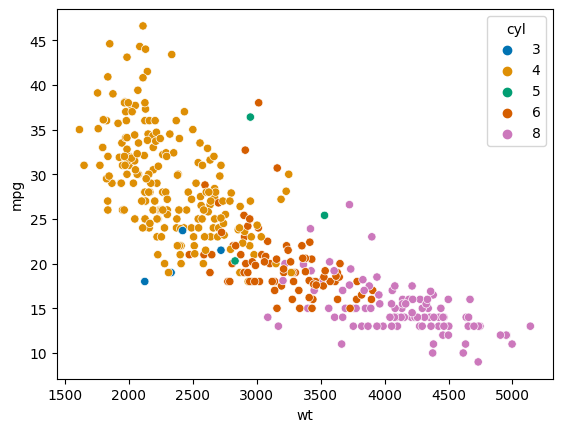

In [21]:
sns.scatterplot(data=car_df, x='wt', y='mpg', hue='cyl', palette='colorblind')

**Observations:**

1. A strong Negative correlation can be seen between the 'wt' and 'mpg'; As 'wt' increases, 'mpg' decreases
2. for higher Number of cylinders,wt is high and mpg is low
3. for lesser Number of cylinders,wt is low and mpg is high
4. A clear seperation between the data points can be seen wrt Number of cylinders, wt and mpg

#### H.Check for unexpected values in all the features and datapoints with such values

In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Observations:**

1. car_name can be unique for each observationa n

In [23]:
car_df['hp']=car_df['hp'].replace({'?':np.nan})

replaced the '?' with Null values

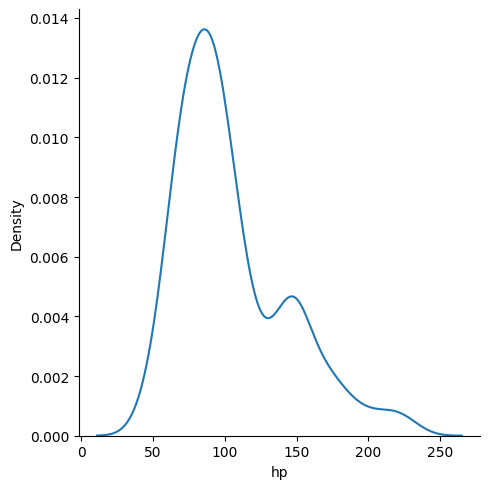

In [24]:
sns.displot(car_df['hp'], kind='kde')

In [25]:
car_df['hp'].fillna(car_df['hp'].median(), inplace=True)

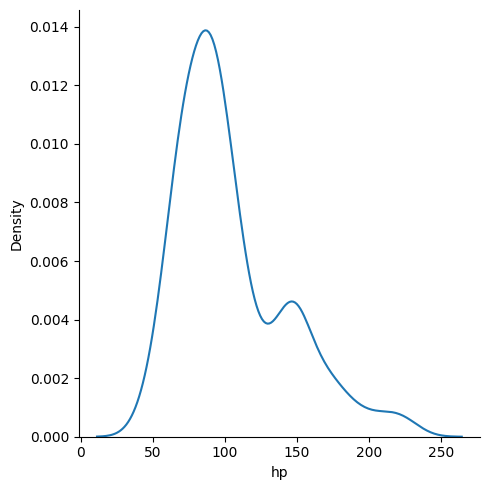

In [26]:
sns.displot(car_df['hp'], kind='kde')

1. Filled the Null values with Median of the data
2. No considerable change in the distribution after replacing with the null values

In [27]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### 3. Clustering:

#### A. Apply K-Means clustering for 2 to 10 clusters
#### B. Plot a visual and find elbow point
#### C. On the above visual, highlight which are the possible Elbow points.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(car_df.drop('car_name', axis=1))

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss = {}
wss = {}
for k in range(2,11):
    km = KMeans(n_init=15, n_clusters=k, random_state=2)
    km.fit(data_scaled)
    wss[k] = km.inertia_
    ss[k] = silhouette_score(data_scaled, labels=km.labels_)

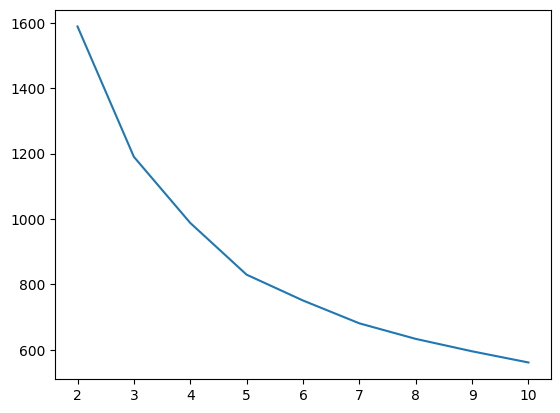

In [30]:
plt.plot(wss.keys(), wss.values())

**Observations:**

possible elbow points are 5, 6, 7

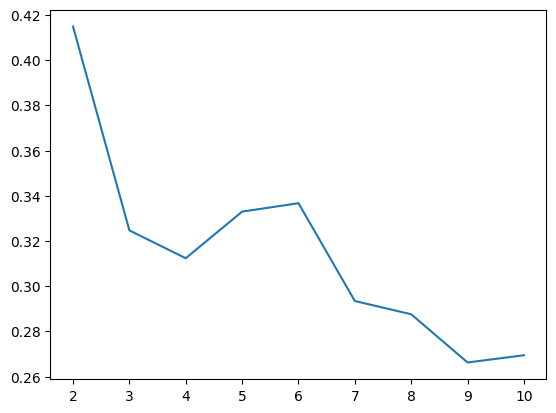

In [31]:
plt.plot(ss.keys(), ss.values())

Number of clusters = 6 (as Silhoutte score is better comparitively)


#### D. Train a K-means clustering model once again on the optimal number of clusters.

In [32]:
km_opt = KMeans(n_init=15, n_clusters=6, random_state=2)
km_opt.fit(data_scaled)

KMeans(n_clusters=6, n_init=15, random_state=2)

#### E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [33]:
car_df['Labels'] = km_opt.labels_

In [34]:
car_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,3
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,2
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,1
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,2
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2


#### F. Plot a visual and color the datapoints based upon clusters

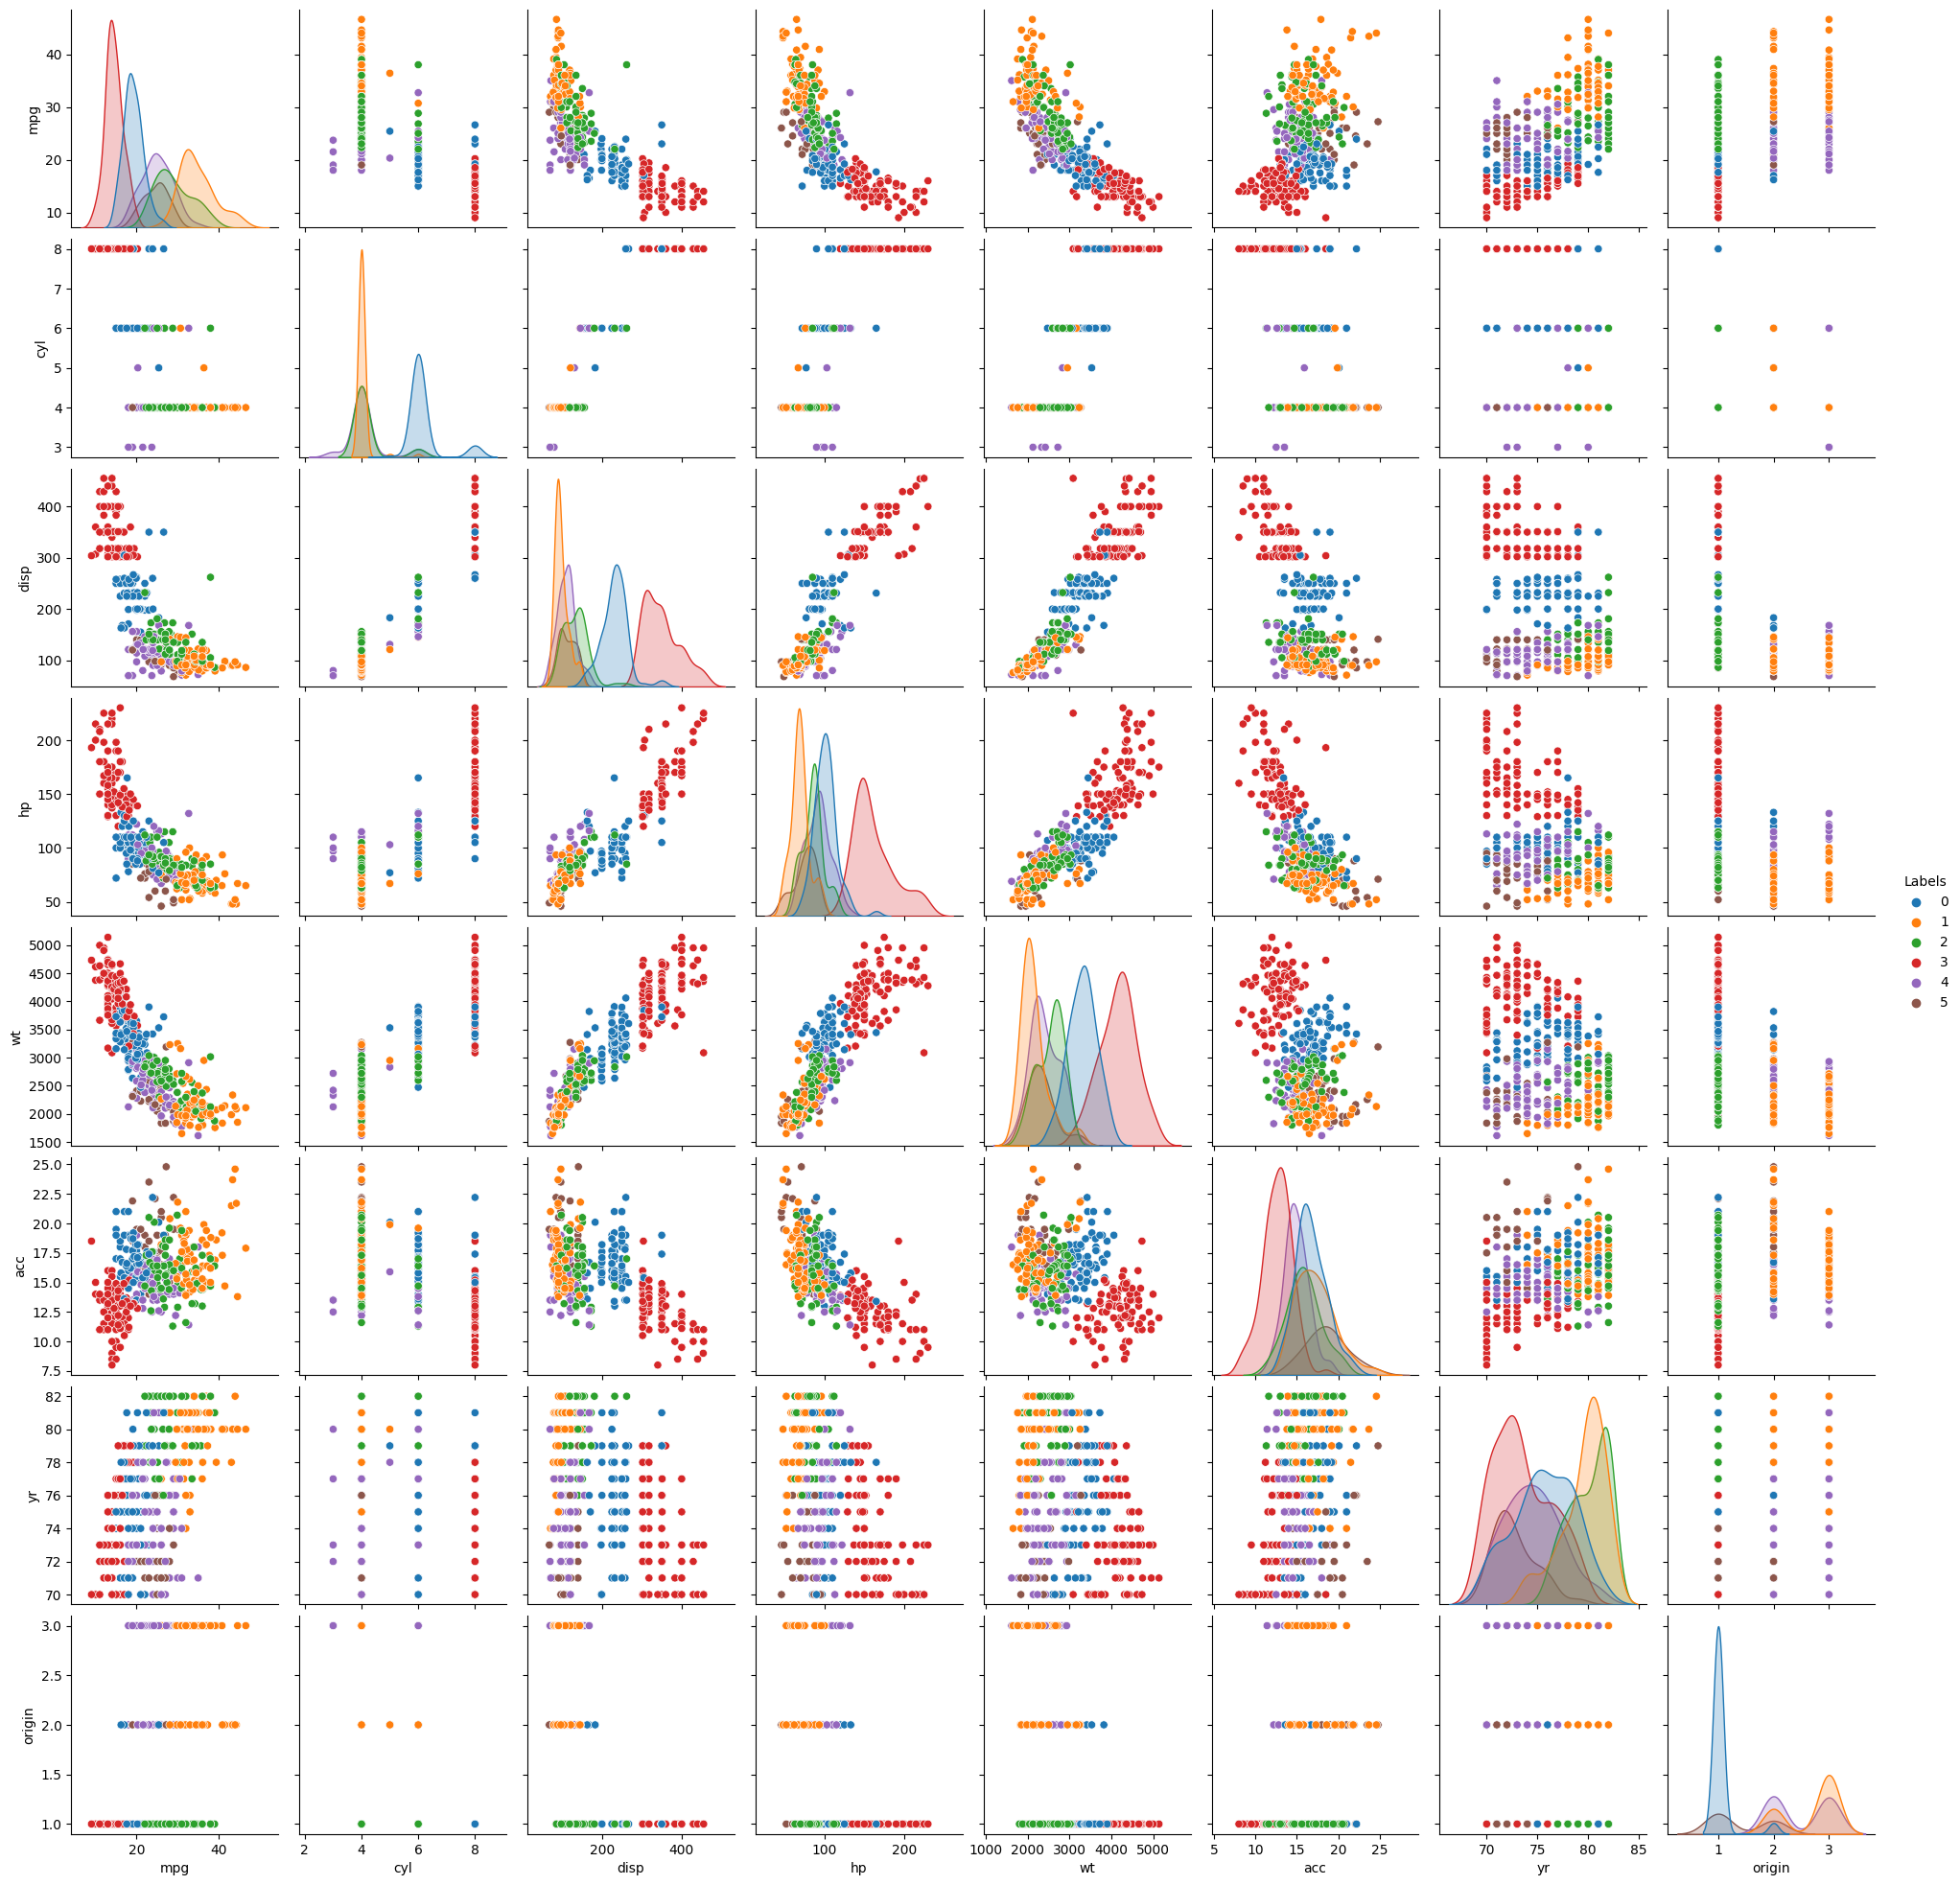

In [35]:
sns.pairplot(car_df, hue='Labels', palette='tab10')

In [36]:
car_df['Labels'].value_counts()

3    95
0    80
1    67
4    65
2    58
5    33
Name: Labels, dtype: int64

**Observations:**
1. In most of the plots, it can be seen that the data clustering has been meaningful
2. It can be seen that few of the clusters have higher data points resulting in dominant view in the plots
3. Though in some places There seems to be overlap between the clusters, The actual data is in higher dimensions and the cluster can be more meaningful in higher dimensions


#### G. Pass a new DataPoint and predict which cluster it belongs to.

In [37]:
import random
new_df = pd.DataFrame(columns=car_df.columns)

In [38]:
num_rows = 1
for i in range(num_rows):
  new=[]
  for col in car_df.columns:
    if col == 'car_name':
      new.append('test_'+str(i))
    elif col in ['disp', 'hp', 'acc']:
      mini = int(min(car_df[col]))
      maxi = int(max(car_df[col]))
      new.append(random.randint(mini, maxi)+random.random())
    elif col == 'cyl':
      new.append(random.choice(car_df[col]))
    else:
      mini = int(min(car_df[col]))
      maxi = int(max(car_df[col]))
      new.append(random.randint(mini, maxi))



  new_df.loc[len(new_df.index)] = new

In [39]:
new_df.drop('Labels', axis=1, inplace=True)

In [40]:
new_data = scaler.transform(new_df.drop(['car_name'], axis=1))

In [41]:
km_opt.predict(new_data)

array([5], dtype=int32)

In [42]:
new_df['Labels'] = km_opt.predict(new_data)

Cluster is predicted using KMean

<center><h1><b>PART - B</b></h1></center>

**DOMAIN :** Automobile


**CONTEXT :** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.


**DATA DESCRIPTION :**
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.


**PROJECT OBJECTIVE :** Apply dimensionality reduction technique – PCA and train a model and compare relative results

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Understanding & Cleaning

#### A. Read ‘vehicle.csv’ and save as DataFrame

In [44]:
veh_df = pd.read_csv('vehicle.csv')

In [45]:
veh_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [46]:
veh_df.shape

(846, 19)

In [47]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [48]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### B. Check percentage of missing values and impute with correct approach

In [49]:
veh_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [50]:
print("Missing Percentage: ")
print("="*30)
for col in veh_df.columns:
  print(f"{col} : {round(veh_df[col].isnull().sum()/veh_df.shape[0]*100,2)}%")

Missing Percentage: 
compactness : 0.0%
circularity : 0.59%
distance_circularity : 0.47%
radius_ratio : 0.71%
pr.axis_aspect_ratio : 0.24%
max.length_aspect_ratio : 0.0%
scatter_ratio : 0.12%
elongatedness : 0.12%
pr.axis_rectangularity : 0.35%
max.length_rectangularity : 0.0%
scaled_variance : 0.35%
scaled_variance.1 : 0.24%
scaled_radius_of_gyration : 0.24%
scaled_radius_of_gyration.1 : 0.47%
skewness_about : 0.71%
skewness_about.1 : 0.12%
skewness_about.2 : 0.12%
hollows_ratio : 0.0%
class : 0.0%


In [51]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

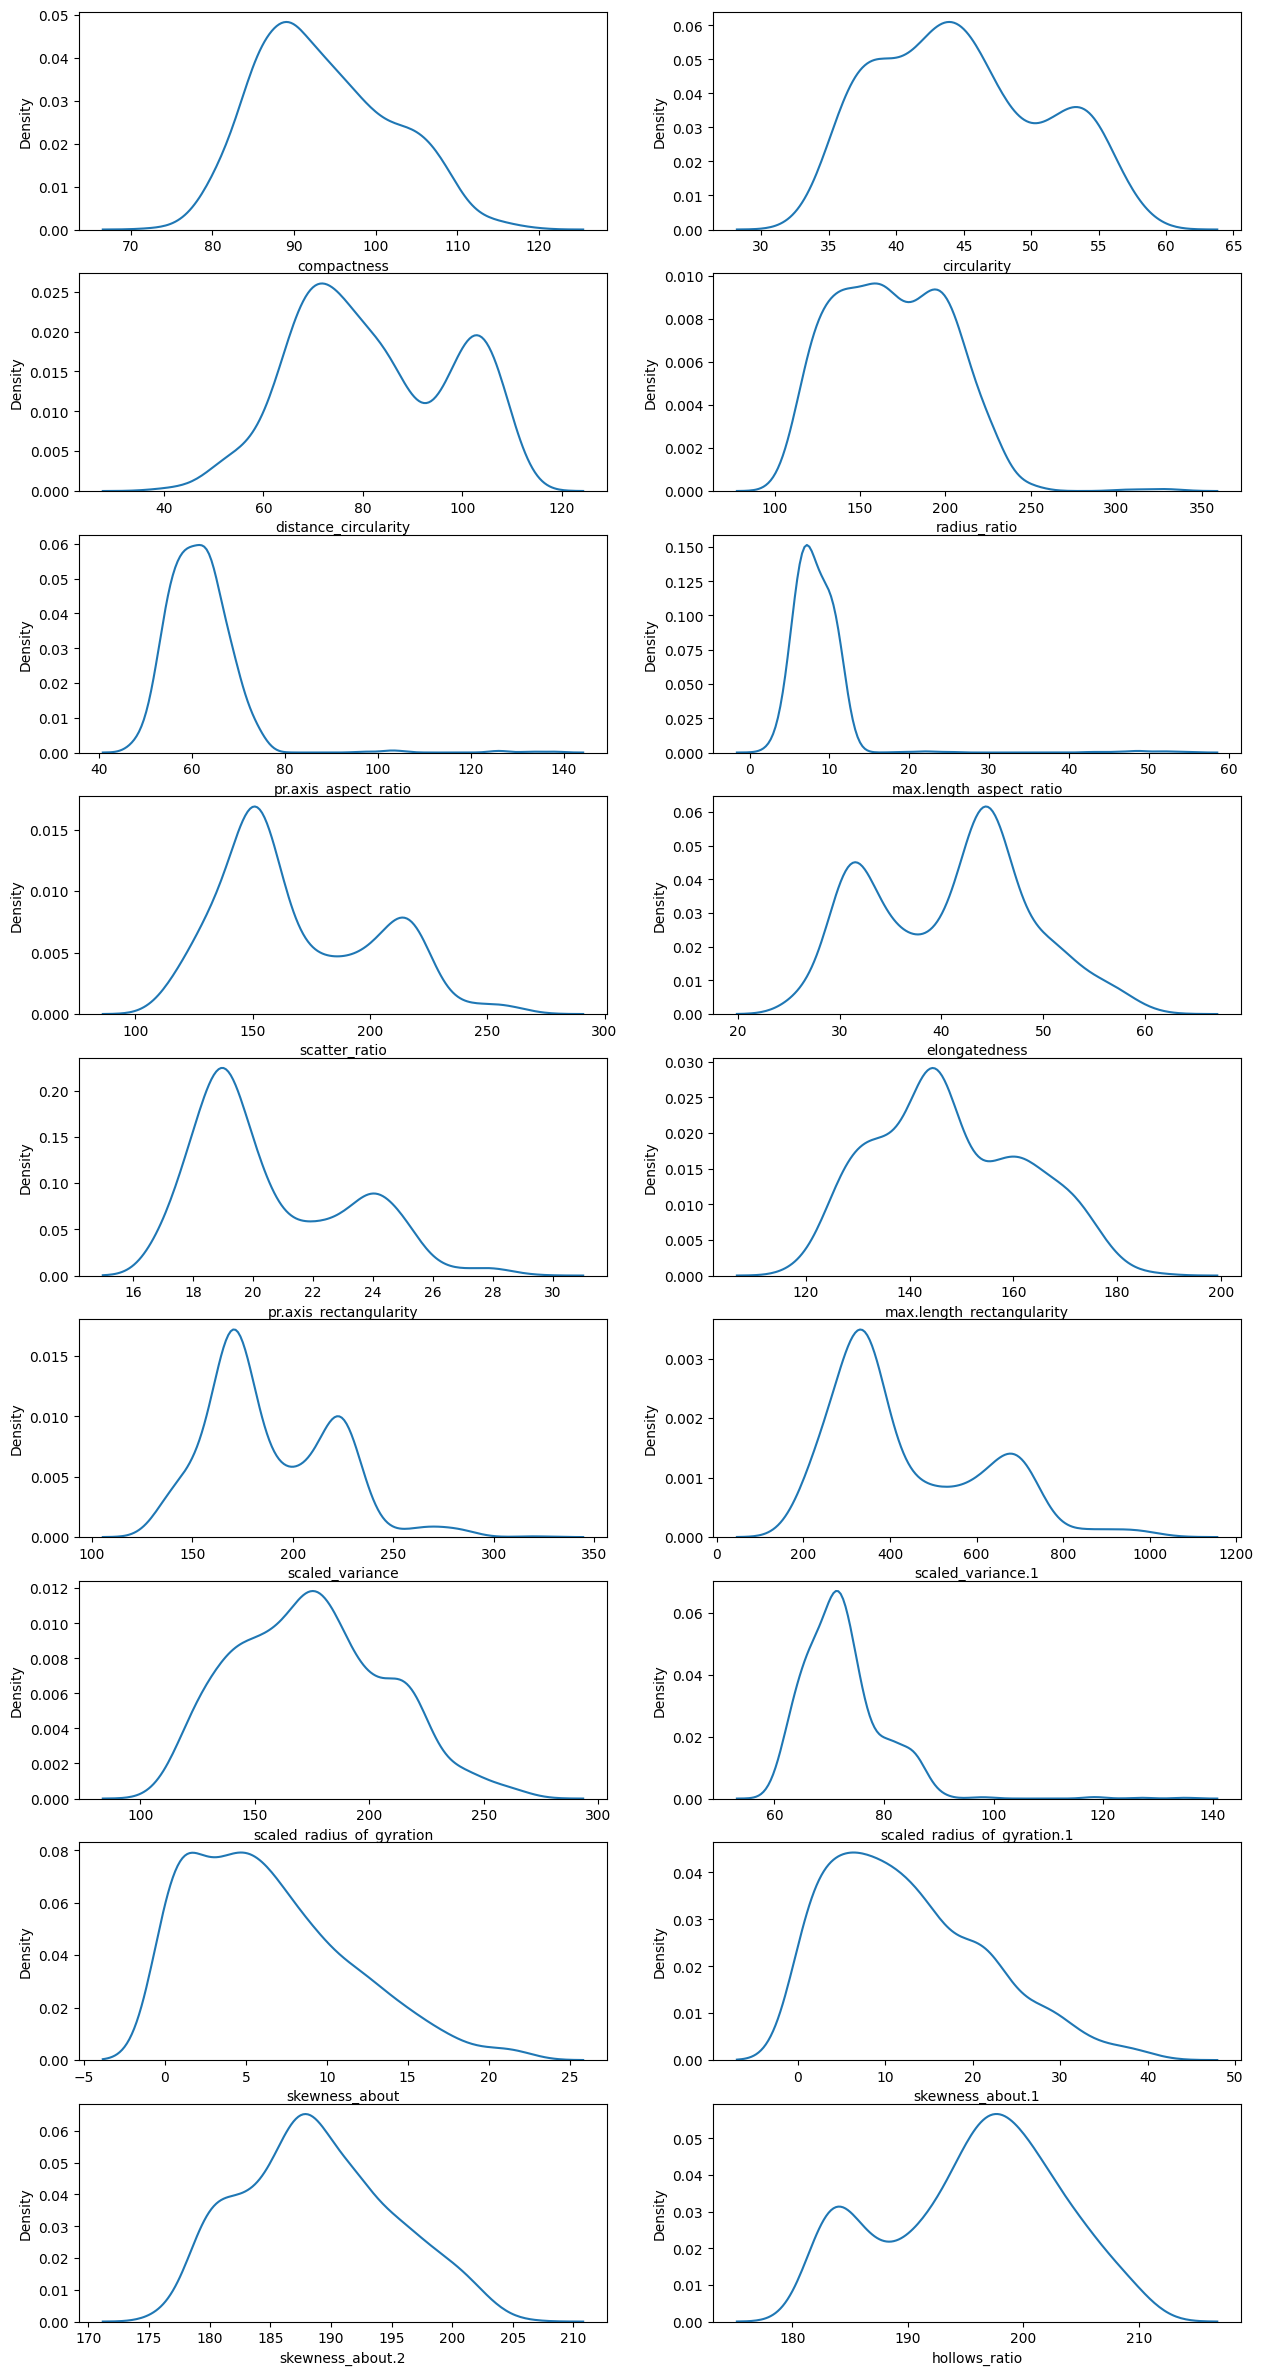

In [52]:
fig, ax = plt.subplots(9,2, figsize=(15,30))

cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

for col in range(len(cols)):
  sns.kdeplot(veh_df[veh_df.columns[col]], ax=ax[col//2, col%2])

**Observations:**

In Most of the scenerios 'Median' can be used

In [53]:
cols = veh_df.select_dtypes('number').columns
for col in cols:
  veh_df[col].fillna(veh_df[col].median(), inplace = True)

In [54]:
veh_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [55]:
print("Missing Percentage: ")
print("="*30)
for col in veh_df.columns:
  print(f"{col} : {round(veh_df[col].isnull().sum()/veh_df.shape[0]*100,2)}%")

Missing Percentage: 
compactness : 0.0%
circularity : 0.0%
distance_circularity : 0.0%
radius_ratio : 0.0%
pr.axis_aspect_ratio : 0.0%
max.length_aspect_ratio : 0.0%
scatter_ratio : 0.0%
elongatedness : 0.0%
pr.axis_rectangularity : 0.0%
max.length_rectangularity : 0.0%
scaled_variance : 0.0%
scaled_variance.1 : 0.0%
scaled_radius_of_gyration : 0.0%
scaled_radius_of_gyration.1 : 0.0%
skewness_about : 0.0%
skewness_about.1 : 0.0%
skewness_about.2 : 0.0%
hollows_ratio : 0.0%
class : 0.0%


All missing data is imputed

#### C. Visualize a Pie-chart and print percentage of values for variable ‘class’

([<matplotlib.patches.Wedge at 0x79020aebf160>,
 [Text(-0.02450677950444812, 1.0997269741887394, 'car'),
  Text(-0.7225894398582384, -0.82937597108028, 'bus'),
  Text(0.8130715899221039, -0.7408877038131637, 'van')],
 [Text(-0.01336733427515352, 0.5998510768302214, '50.7%'),
  Text(-0.39413969446813, -0.4523868933165163, '25.8%'),
  Text(0.4434935945029657, -0.4041205657162711, '23.5%')])

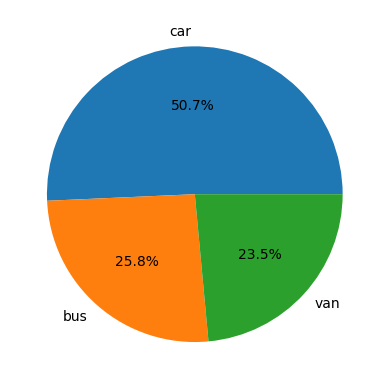

In [56]:
plt.pie(veh_df['class'].value_counts(),
        labels=veh_df['class'].value_counts().index,
         autopct='%1.1f%%')

**Observations:**

1. More than 50% of the data are of class 'Car'
2. 'bus' & 'van' are approximately of equal count

#### D. Check for duplicate rows in the data and impute with correct approach

In [57]:
veh_df.duplicated().sum()

0

No duplicated data is present in the data

### 2. Data Preparation

#### A. Split data into X and Y

In [58]:
X = veh_df.drop('class', axis=1)

In [59]:
y = veh_df['class']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=2)

In [61]:
print(f'X Train percentage: {round(X_train.shape[0]/X.shape[0]*100)}%')
print(f'y Train percentage: {round(y_train.shape[0]/y.shape[0]*100)}%')
print(f'X Test percentage: {round(X_test.shape[0]/X.shape[0]*100)}%')
print(f'y Test percentage: {round(y_test.shape[0]/y.shape[0]*100)}%')


X Train percentage: 80%
y Train percentage: 80%
X Test percentage: 20%
y Test percentage: 20%


#### B. Standardize the Data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled.shape

(676, 18)

In [64]:
X_train.shape

(676, 18)

### 3. Model Building

#### A. Train a base Classification model using SVM
#### B. Print Classification metrics for train data

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(random_state = 1)

In [67]:
svc.fit(X_train_scaled, y_train)

SVC(random_state=1)

In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
def all_metrics(model, X_train, y_train, X_test, y_test):
  y_preds_train = model.predict(X_train)
  y_preds_test = model.predict(X_test)

  a_tr = round(accuracy_score(y_preds_train, y_train)*100,2)
  r_tr = round(recall_score(y_preds_train, y_train, average='micro')*100,2)
  p_tr = round(precision_score(y_preds_train, y_train, average='micro')*100,2)
  f1_tr = round(f1_score(y_preds_train, y_train, average='micro')*100,2)

  a_ts = round(accuracy_score(y_preds_test, y_test)*100,2)
  r_ts = round(recall_score(y_preds_test, y_test, average='micro')*100,2)
  p_ts = round(precision_score(y_preds_test, y_test, average='micro')*100,2)
  f1_ts = round(f1_score(y_preds_test, y_test, average='micro')*100,2)

  print("Training set Metrics: ")
  print("======================")
  print(f"Accuracy : {a_tr}%")
  print(f"Recall : {r_tr}%")
  print(f"Precision : {p_tr}%")
  print(f"F1-Score : {f1_tr}%")

  print()
  print("Testing set Metrics: ")
  print("===================")
  print(f"Accuracy : {a_ts}%")
  print(f"Recall : {r_ts}%")
  print(f"Precision : {p_ts}%")
  print(f"F1-Score : {f1_ts}%")
  print()


  fig, ax = plt.subplots(1,2, figsize=(10,4))
  sns.heatmap(confusion_matrix(y_preds_train,y_train), annot = True, cmap = 'Blues', ax=ax[0])
  ax[0].set_title('Train set')
  sns.heatmap(confusion_matrix(y_preds_test,y_test), annot = True, cmap = 'Blues', ax=ax[1])
  ax[1].set_title('Test set')

  return (a_tr, r_tr, p_tr, f1_tr, a_ts, r_ts, p_ts, f1_ts)


def model_impr(met_tup1, met_tup2):
  out = []
  name = {0: 'Accuracy improvemnt: ', 1: 'Recall improvemnt: ', 2: 'Precision improvemnt: ', 3: 'F1-Score improvemnt: ',
          4: 'Accuracy improvemnt: ', 5: 'Recall improvemnt: ', 6: 'Precision improvemnt: ', 7: 'F1-Score improvemnt: '}
  for i in range(len(met_tup1)):
      if i==0:
        print('\nTraining Performance improvement: ')
        print("=================================")
      elif i==4:
        print('\nTesting Performance improvement: ')
        print("================================")
      out.append(round((met_tup1[i]-met_tup2[i])/met_tup2[i]*100,2))
      print(name[i], f"{out[-1]}%")






Training set Metrics: 
Accuracy : 97.63%
Recall : 97.63%
Precision : 97.63%
F1-Score : 97.63%

Testing set Metrics: 
Accuracy : 98.82%
Recall : 98.82%
Precision : 98.82%
F1-Score : 98.82%



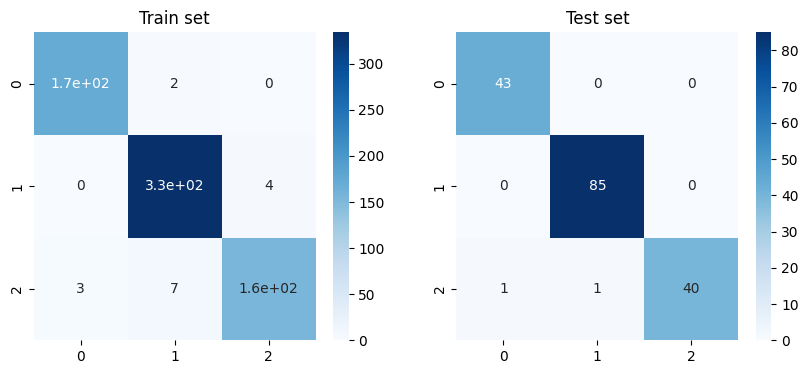

In [69]:
svc_met = all_metrics(svc, X_train_scaled, y_train, X_test_scaled, y_test)

#### C. Apply PCA on the data with 10 components.
#### D. Visualize Cumulative Variance Explained with Number of Components
#### E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state = 1)
pca.fit(X_train_scaled)

PCA(n_components=10, random_state=1)

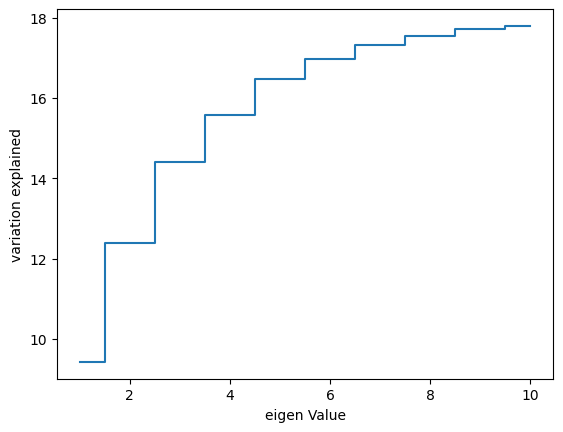

In [71]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_), where='mid')
plt.ylabel('variation explained')
plt.xlabel('eigen Value')
plt.show()

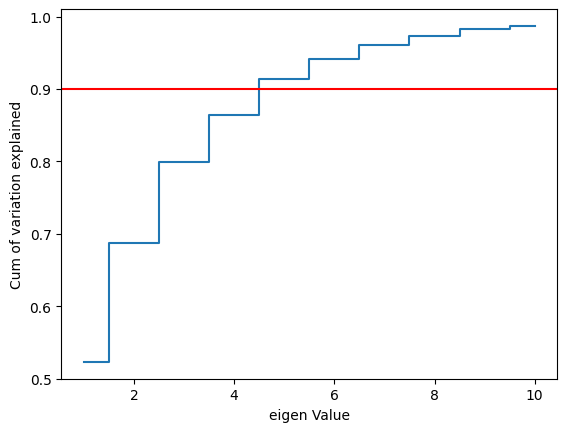

In [72]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

#### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [73]:
pca5 = PCA(n_components=5, random_state=1)

In [74]:
pca5.fit(X_train_scaled)

PCA(n_components=5, random_state=1)

In [75]:
xpca5 = pca5.transform(X_train_scaled)
xtpca5 = pca5.transform(X_test_scaled)

#### G. Train SVM model on components selected from above step
#### H. Print Classification metrics for train data of above model and share insights

In [76]:
svm_pca = SVC(random_state=1)

In [77]:
svm_pca.fit(xpca5, y_train)

SVC(random_state=1)

Training set Metrics: 
Accuracy : 80.33%
Recall : 80.33%
Precision : 80.33%
F1-Score : 80.33%

Testing set Metrics: 
Accuracy : 80.59%
Recall : 80.59%
Precision : 80.59%
F1-Score : 80.59%



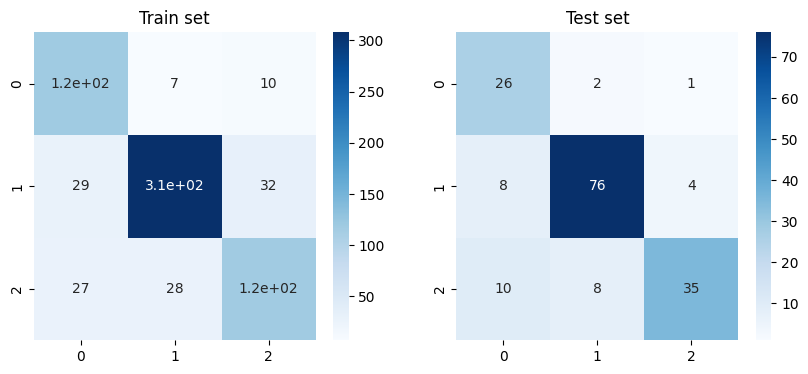

In [78]:
svm_pca_met = all_metrics(svm_pca, xpca5, y_train, xtpca5, y_test)

**Observations:**
1. Even after reducing the number of features from 18 to 5 (i.e., less than one-third of the column), The metrics show that the performance is good approximately 80%.
2. Some Hypertuning may help in increasing the performance even better

### 4. Performance Improvement


#### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [79]:
svm_new = SVC(random_state=1)

In [80]:
svm_new.fit(xpca5, y_train)


SVC(random_state=1)

In [81]:
svm_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [82]:
from sklearn.model_selection import GridSearchCV
svc_opt = GridSearchCV(estimator=svm_new, param_grid=svm_param, cv=5, scoring='accuracy')

In [83]:
svc_opt.fit(xpca5, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

#### B. Share best Parameters observed from above step.

In [84]:
print("best Params are: ")
print(svc_opt.best_params_)

best Params are: 
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

Training set Metrics: 
Accuracy : 87.28%
Recall : 87.28%
Precision : 87.28%
F1-Score : 87.28%

Testing set Metrics: 
Accuracy : 84.12%
Recall : 84.12%
Precision : 84.12%
F1-Score : 84.12%



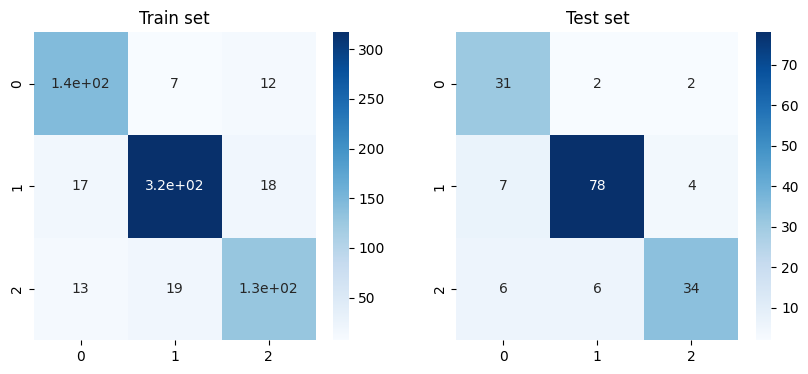

In [85]:
svc_opt_met = all_metrics(svc_opt, xpca5, y_train, xtpca5, y_test)


In [86]:
print("Performance comparison between Hypertuned SVM model on PCA data and Regular SVM model on PCA Data:")
model_impr(svc_opt_met, svm_pca_met)

Performance comparison between Hypertuned SVM model on PCA data and Regular SVM model on PCA Data:

Training Performance improvement: 
Accuracy improvemnt:  8.65%
Recall improvemnt:  8.65%
Precision improvemnt:  8.65%
F1-Score improvemnt:  8.65%

Testing Performance improvement: 
Accuracy improvemnt:  4.38%
Recall improvemnt:  4.38%
Precision improvemnt:  4.38%
F1-Score improvemnt:  4.38%


In [87]:
print("Performance comparison between Hypertuned SVM model on PCA data and Regular SVM model on Scaled Data:")
model_impr(svc_opt_met, svc_met)

Performance comparison between Hypertuned SVM model on PCA data and Regular SVM model on Scaled Data:

Training Performance improvement: 
Accuracy improvemnt:  -10.6%
Recall improvemnt:  -10.6%
Precision improvemnt:  -10.6%
F1-Score improvemnt:  -10.6%

Testing Performance improvement: 
Accuracy improvemnt:  -14.88%
Recall improvemnt:  -14.88%
Precision improvemnt:  -14.88%
F1-Score improvemnt:  -14.88%


In [88]:
print("Performance comparison between Regular SVM model on PCA Data and Regular SVM model on Scaled Data:")
model_impr(svm_pca_met, svc_met)

Performance comparison between Regular SVM model on PCA Data and Regular SVM model on Scaled Data:

Training Performance improvement: 
Accuracy improvemnt:  -17.72%
Recall improvemnt:  -17.72%
Precision improvemnt:  -17.72%
F1-Score improvemnt:  -17.72%

Testing Performance improvement: 
Accuracy improvemnt:  -18.45%
Recall improvemnt:  -18.45%
Precision improvemnt:  -18.45%
F1-Score improvemnt:  -18.45%


**Observations:**

1. Performance of Hypertuned SVM model on PCA data has improved 8.65% in training data and 4.38% in testing data compared to Regular SVM model on PCA Data
2. Performance of the hypertuned SVM model on PCA data has decreased by about 10.6% in Training set and 14.88% in testing set compared to Regular SVM model on Scaled data
3. Performance of Regular SVM model on PCA Data has decreased by about 18% compared to Regular SVM model on Scaled Data
<br>
<br>
**Terminology Used:**

*Scaled data:* Standard data which is scaled

*PCA data:* Scaled data on which PCA algorithm is applied

*hypertuned model:* SVM Model which is hypertuned

*Regular model:* SVM model which is not hypertuned


<br>

<strong>Performance Ranking</strong>
<table>
<strong><thead>
<th></th>
<th>Regular Model</th>
<th>Hypertuned Model</th>
</thead></strong>
<tbody>
<tr>
<strong><td>Scaled Data</td></strong>
<center><td>1</td></center>
<center><td>-</td></center>
</tr>
<tr>
<strong><td>PCA Data</td></strong>
<center><td>3</td></center>
<center><td>2</td></center>
</tr>
</table>


#### 5. Data Understanding & Cleaning

#### A. Explain pre-requisite/assumptions of PCA

**Reference:** https://www.mygreatlearning.com/blog/understanding-principal-component-analysis/


**Assumptions/ Pre-requisites:**
1. PCA Identifies the multi-colinearity between the Features and replaces the Features with the uncorrelated components (Principal componets) thereby reducing the dimensionality of the data. So Data need to be having **strong Linear correlation**

2. PCA assumes that all the Features have **roughly same Variance** as covariance matrix can be effected with high variability in the variance of features. Thus PCA can be performing worst.

3. PCA assumes that Columns are **Independent**, i.e., if all the components have linear correlation, It can be impossible to find the orthogonal components, thereby unable to capture the information

4. PCA Assumes that all the features in the data are on **comparable scale** to have equal influence on the analysis. So it is recommended to Normalize/ standardize the data

5. PCA Assumes that there are **no ouliers** in the data, as outliers can affect the correlations resulting in forming Principal components which are unreliable

6. PCA assumes that the sample size is high. as large sample size results in stabilizing the Principal components and remain robust

#### B. Explain advantages and limitations of PCA

**Advantages of PCA:**

1. Dimensionality Reduction: PCA reduces the number of variables in a dataset while retaining most of the variance.
2. Noise reduction: By considering the covariance matrix, PCA ignores the noise present in the data
3. Visualization: PCA helps in reducing the higher dimensional data to 2 or 3 dimensional enabling to visualize the data
4. Feature Engineering: PCA uses the features present in the dataset and reduces the dimensionality by extracting the principal components. Thus Feature selection can be performed


**Limitations of PCA:**

1. Linearity Assumption: PCA assumes that data is Linearly correlated, if the data is non-linearly correlated, PCA may not perform well.
2. Loss of information: As the dimensionality of the data decreases, there can be a possibility of the information loss. this effect can be major issue if Number of Principal components are chosen less
3. Sensitive to outliers: Outliers can distort the principal components and can make the data unreliable, so Outlier treatment is necessary
4. Sensitivity to Scaling: PCA assumes that data to be having equal effect on output and so scaling is required, otherwise there is a possibility of larger scale data dominating in principal component formation
5. Loss of Interpretability:It can be impossible to interpret the meaning of principal components